In [245]:
import pandas as pd
import matplotlib.pyplot as plt
mport numpy as np

df_ovnis = pd.read_csv("ovnis.csv", index_col=[0])

df_relatos = df_ovnis
df_relatos = df_relatos.groupby('State').count()
df_relatos = df_relatos.sort_values(ascending=False, by="Posted")['Posted']

print("Os quatro Estados com mais relatos")
print(df_relatos.head(4))

Os quatro Estados com mais relatos
State
CA    7911
FL    4352
WA    3225
TX    2882
Name: Posted, dtype: int64


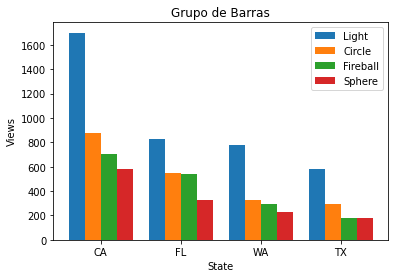

In [279]:
light = df_ovnis[df_ovnis['Shape'] == 'Light']
circle = df_ovnis[df_ovnis['Shape'] == 'Circle']
fireball = df_ovnis[df_ovnis['Shape'] == 'Fireball']
sphere = df_ovnis[df_ovnis['Shape'] == 'Sphere']

estados_light = []
estados_circle = []
estados_fireball = []
estados_sphere = []

states = ['CA', 'FL', 'WA', 'TX']

for state in states:
  estados_light.append(light[light['State'] == state].count()['Posted'])
  estados_circle.append(circle[circle['State'] == state].count()['Posted'])
  estados_fireball.append(fireball[fireball['State'] == state].count()['Posted'])
  estados_sphere.append(sphere[sphere['State'] == state].count()['Posted'])

# Cria eixo x para produto A e produto B com uma separação de 0.20 entre as barras
x1 =  np.arange(len(estados_light))
x2 = [x + 0.20 for x in x1]
x3 = [x + 0.20 for x in x2]
x4 = [x + 0.20 for x in x3]

# Plota as barras
plt.bar(x1, estados_light, width=0.20, label = 'Light')
plt.bar(x2, estados_circle, width=0.20, label = 'Circle')
plt.bar(x3, estados_fireball, width=0.20, label = 'Fireball')
plt.bar(x4, estados_sphere, width=0.20, label = 'Sphere')

plt.xticks([x + 0.30 for x in range(len(estados_light))], states)

# insere uma legenda no gráfico
plt.legend()

plt.title("Grupo de Barras")
plt.xlabel('State')
plt.ylabel('Views')
plt.show()

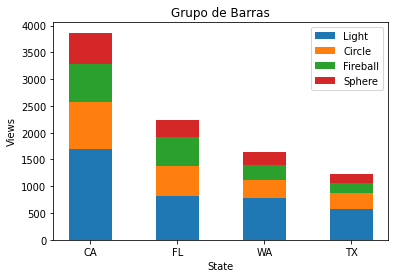

In [296]:
# Cria eixo x para produto A e produto B com uma separação de 0.20 entre as barras
x =  np.arange(len(estados_light))

fireball_bottom = []
sphere_bottom = []
for i in range(0,4):
  fireball_soma = int(estados_light[i]) + int(estados_circle[i])
  fireball_bottom.append(fireball_soma)

  sphere_soma = int(estados_light[i]) + int(estados_circle[i]) + int(estados_fireball[i])  
  sphere_bottom.append(sphere_soma)

# Plota as barras
plt.bar(x, estados_light, width=0.50, label = 'Light')
plt.bar(x, estados_circle, width=0.50, label = 'Circle', bottom=estados_light)
plt.bar(x, estados_fireball, width=0.50, label = 'Fireball', bottom=fireball_bottom)
plt.bar(x, estados_sphere, width=0.50, label = 'Sphere', bottom=sphere_bottom)

plt.xticks([x for x in range(len(estados_light))], states)

# insere uma legenda no gráfico
plt.legend()

plt.title("Grupo de Barras")
plt.xlabel('State')
plt.ylabel('Views')
plt.show()